# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
### <p style="text-align: center;"> <b> Question 1: What makes song popular? </b></p>


---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question

What makes song popular?

### 1.1 The purpose of the question

 There are numerous factors that can contribute to the creation of a good song that attracts millions of listeners. As producers or singers, if we are aware of these factors, they can be incredibly helpful in improving our approach to composing a song and the methods we use to do so.

### 1.2 How to solve the question

Analyse the factors(attributes) of the songs which has the following properties:

1. Factors(Attributes) from the most popular song of each year

2. Factors(Attributes) from the phases when the changing rate of streams was remarkable

3. Factors(Attributes) of bests songs from multiple charts(Apple, Deezer, Spotify)

4. Factors(Attributes) of songs that appear the most in playlist of different platforms(Spotify, Deezer or Apple)

## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**📊 Get data**

In [130]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

#### Find insights from data by visualizing and analysing

<i>**Get number of songs released in each years**</i>

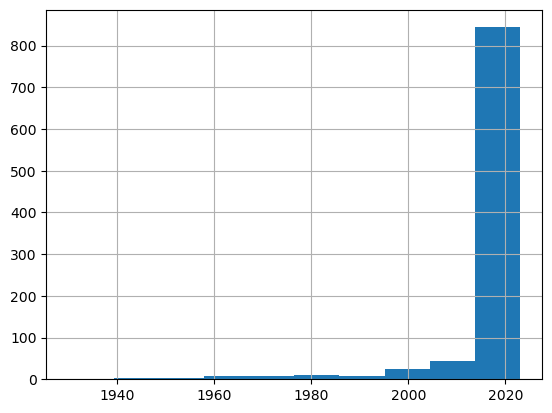

In [131]:
df['released_year'].hist();

🤔 In 21th century, people tend to hear music more. We can see the number of songs after 2000 increase significantly, indicating that music more and more comes closer to people's life and improve their life in positive ways. 

<i>**Song with highest Streams**<i/>

In [132]:
highest_streams_song = df.sort_values(by='streams', ascending=False).iloc[:1].T
highest_streams_song

,55
track_name,Blinding Lights
artist(s)_name,The Weeknd
artist_count,1
released_year,2019
released_month,11
released_day,29
in_spotify_playlists,43899
in_spotify_charts,69.0
streams,3703895074.0
in_apple_playlists,672


<i>**Most popular songs from 1930 to 2023**</i>

In [133]:
released_years = sorted(list(df['released_year'].value_counts().index))
best_songs = {}

for year in released_years:
  songs = df[df['released_year'] == year]
  songs = songs.sort_values(by=['streams'], ascending=False)
  best_song = songs.iloc[0]
  best_songs[year] = best_song

best_songs_df = pd.DataFrame(best_songs)

best_songs_df.T[['track_name', 'streams']].sort_index(ascending=False)[:10]

,track_name,streams
2023,Flowers,1316855716.0
2022,As It Was,2513188493.0
2021,STAY (with Justin Bieber),2665343922.0
2020,Heat Waves,2557975762.0
2019,Blinding Lights,3703895074.0
2018,Someone You Loved,2887241814.0
2017,Shape of You,3562543890.0
2016,One Dance,2713922350.0
2015,Love Yourself,2123309722.0
2014,Thinking Out Loud,2280566092.0


<i>**Most popular songs of each year and their corresponding streams**</i>

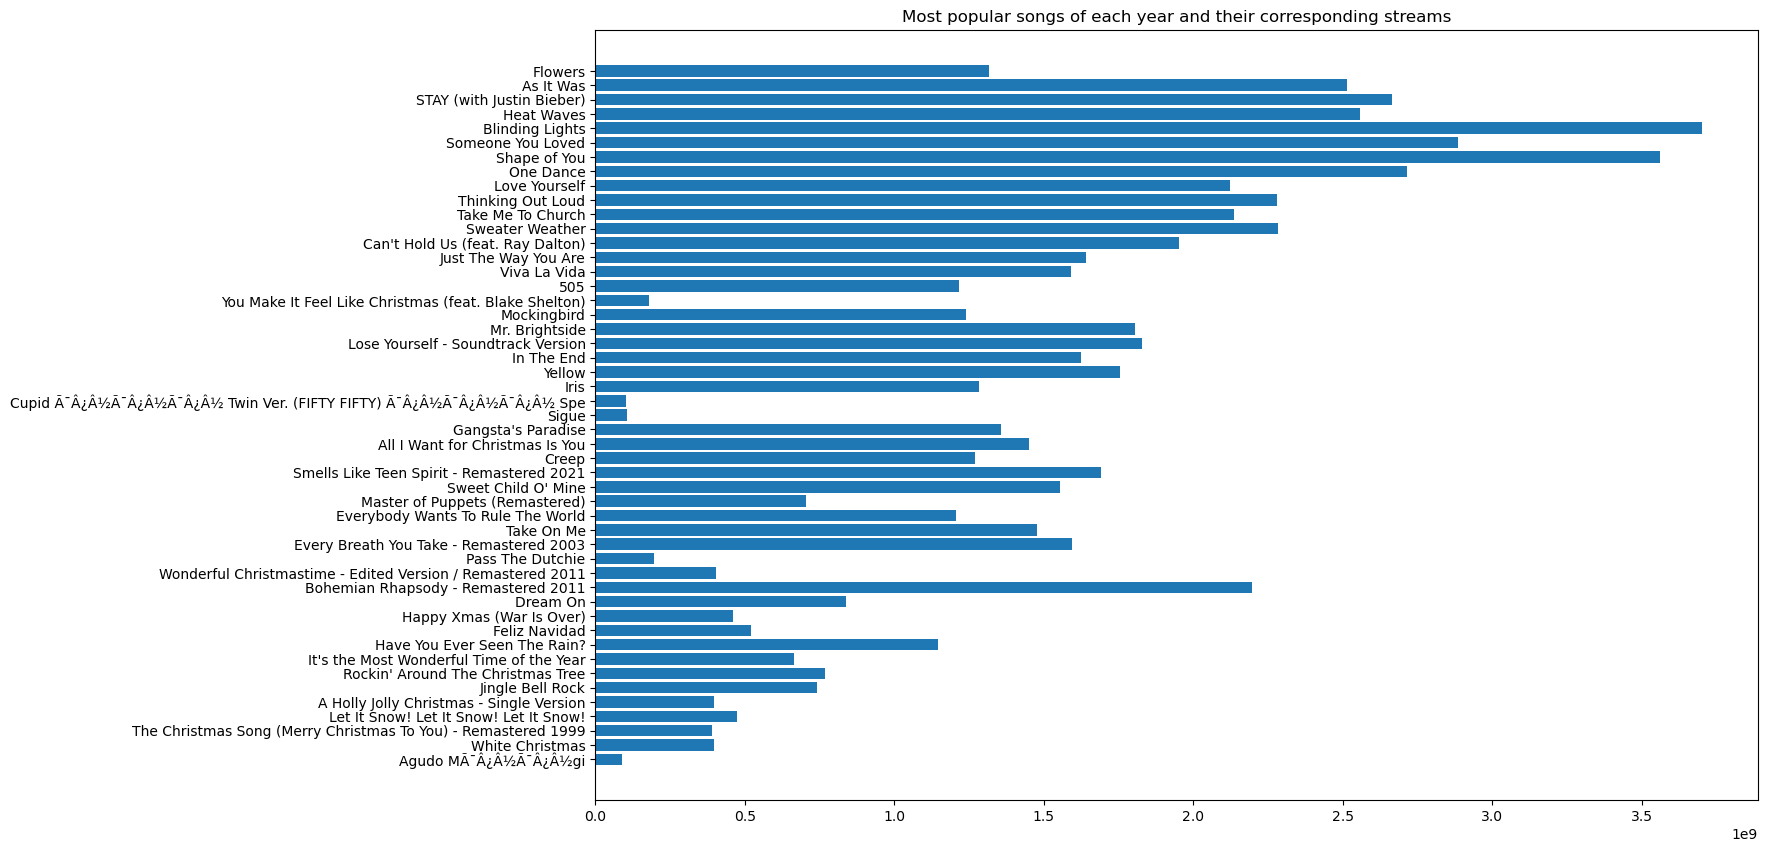

In [134]:
best_songs_name, best_songs_streams = best_songs_df.T['track_name'], best_songs_df.T['streams']
plt.figure(figsize=(15, 10))
plt.title('Most popular songs of each year and their corresponding streams')
plt.barh(best_songs_name, best_songs_streams);

- Lowest/highest streams and corresponding year

In [135]:
best_songs_streams[best_songs_streams == best_songs_streams.values.min()]

1930    90598517.0
Name: streams, dtype: object

In [136]:
best_songs_streams[best_songs_streams == best_songs_streams.values.max()]

2019    3703895074.0
Name: streams, dtype: object

- Comment:
  - The best songs in some years have the streams that are **very high** compare to the remaining
    1. Blinding Lights
    2. Shape of You 
    3. Someone You Loved
  - Some best songs have the **lowest streams**
    1. Cupid
    2. Sigue
    3. Agudo

- Choose 3 songs which has the **highest streams of respected year**

In [137]:
highest_streams_respected_year_songs = best_songs_df.T.sort_values(by='streams', ascending=False)[:3]
highest_streams_respected_year_songs.T

,2019,2017,2018
track_name,Blinding Lights,Shape of You,Someone You Loved
artist(s)_name,The Weeknd,Ed Sheeran,Lewis Capaldi
artist_count,1,1,1
released_year,2019,2017,2018
released_month,11,1,11
released_day,29,6,8
in_spotify_playlists,43899,32181,17836
in_spotify_charts,69.0,10.0,53.0
streams,3703895074.0,3562543890.0,2887241814.0
in_apple_playlists,672,33,440


<i>**The changing rate of streams of most popular songs in each year**</i>

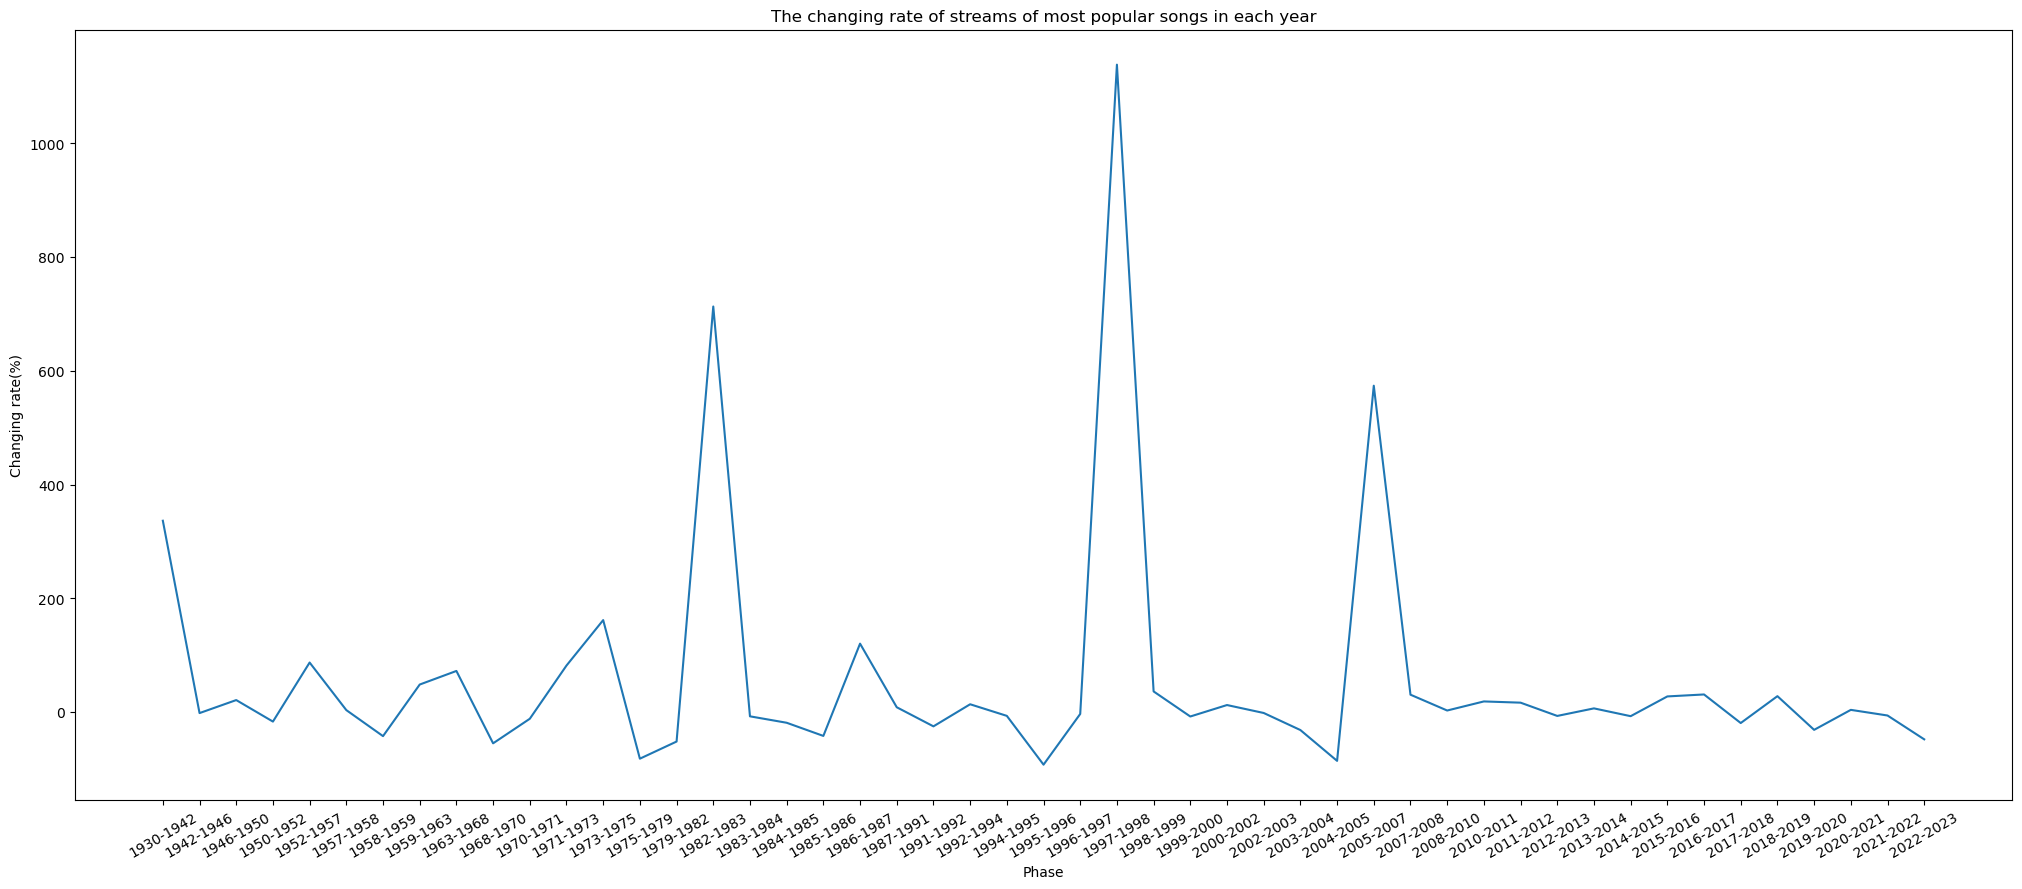

In [138]:
first = True
last_stream, last_year = None, None
changing_rate_df = {}

for year, stream in best_songs_streams.items():
  if first:
    first = False
    last_stream = stream
    last_year = year
    continue
  changing_rate_df[str(last_year) + '-' + str(year)] = (stream - last_stream) / last_stream * 100
  
  last_stream = stream
  last_year = year

changing_rate_df

plt.figure(figsize=(25, 10))
plt.xticks(rotation=30)
plt.ylabel('Changing rate(%)')
plt.xlabel('Phase')
plt.title('The changing rate of streams of most popular songs in each year')
plt.plot(changing_rate_df.keys(), changing_rate_df.values());

- Remarkable Phases and their respective changing rate

In [139]:
sorted(changing_rate_df.items(), key = lambda x: x[1], reverse=True)[:3]

[('1997-1998', 1138.349485697716),
 ('1982-1983', 713.2314129568595),
 ('2005-2007', 574.0157872843921)]

- Comments:
  
  - There 3 noticeable phases where the changing rate changed significantly: **1982-1983, 1997-1998 and 2005-2007**
    1. In 1982-1983: 1138.345%
    2. In 1997-1998: 713.23%
    3. In 2005-2007: 574.01%


- Choose the songs in **1983, 1998, 2007** because these songs make the significant change

In [140]:
significant_changing_rate_songs = best_songs_df[[1983, 1998, 2007]]
significant_changing_rate_songs

,1983,1998,2007
track_name,Every Breath You Take - Remastered 2003,Iris,505
artist(s)_name,The Police,The Goo Goo Dolls,Arctic Monkeys
artist_count,1,1,1
released_year,1983,1998,2007
released_month,1,3,4
released_day,6,31,20
in_spotify_playlists,22439,13101,13985
in_spotify_charts,19.0,9.0,25.0
streams,1593270737.0,1284942608.0,1217120710.0
in_apple_playlists,211,137,30


<i>**The average streams of each years**</i>

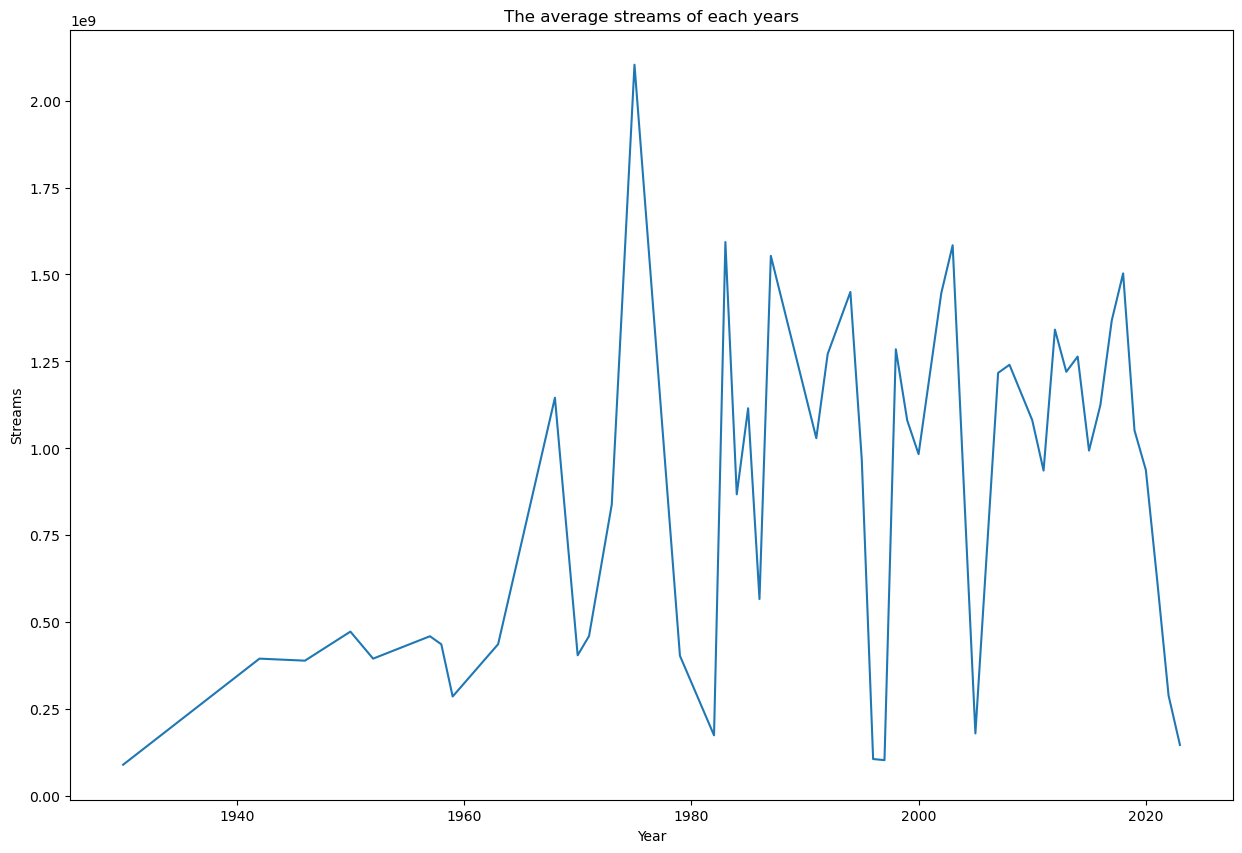

In [141]:
avg_stream_df = df[['released_year', 'streams']].groupby(by='released_year').mean()

plt.figure(figsize=(15, 10))
plt.title('The average streams of each years')
plt.xlabel('Year')
plt.ylabel('Streams')
plt.plot(avg_stream_df.index, avg_stream_df.values);

In [142]:
avg_stream_df['streams'].idxmax(), avg_stream_df['streams'].max()

(1975, 2103052676.0)

In [143]:
avg_stream_df['streams'].idxmin(), avg_stream_df['streams'].min()

(1930, 90598517.0)

- We can see that the **highest average streams** take place in 1975 but when we see it clearly, we know that in 1975, there are only **2 songs**: Riptide and Bohemian Rhapsody - Remastered 2011

In [144]:
df[df['released_year'] == 1975]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
80,Riptide,Vance Joy,1,1975,1,1,31123,55.0,2.009095e+09,300,...,102,C#,Major,48,50,73,43,0,15,4
717,Bohemian Rhapsody - Remastered 2011,Queen,1,1975,10,31,40112,3.0,2.197011e+09,321,...,71,C,Minor,41,23,40,27,0,30,5


- Comments

  - The chart tend to go up(some year it went down remarkably). Therefore, some factors may affect these changing. First is number of songs released in that year(fewer songs may make the average streams higher,...)
  - The **highest** average streams is 2103052676.0 in 1975
  
  - The **lowest** average streams is 90598517.0 in 1930

- In average streams chart, we can take it into account when we first get start with the data. However, for further analysis, we won't take this because this average metrics may affect by multiple factors(outliers, noise,...)

<i>**Best songs in spotify charts**</i>

In [145]:
def top_10_songs_in_chart(name):
  return df[(df['released_year'] == 2023) & df[name] != 0].sort_values(by=name)

spotify_best_songs = top_10_songs_in_chart('in_spotify_charts')

spotify_best_songs[['track_name']]


,track_name
254,Mejor Que Yo
228,Hummingbird (Metro Boomin & James Blake)
385,VIBE (feat. Jimin of BTS)
249,Oi Balde - Ao Vivo
340,Heaven
...,...
29,Dance The Night (From Barbie The Album)
17,What Was I Made For? [From The Motion Picture ...
2,vampire
12,Flowers


- Top 3 best songs from Spotify Chart

In [146]:
top_spotify_best_songs = spotify_best_songs[:3]
top_spotify_best_songs.T

,254,228,385
track_name,Mejor Que Yo,Hummingbird (Metro Boomin & James Blake),VIBE (feat. Jimin of BTS)
artist(s)_name,"Mambo Kingz, DJ Luian, Anuel Aa","James Blake, Metro Boomin","TAEYANG, Jimin"
artist_count,3,2,2
released_year,2023,2023,2023
released_month,5,6,1
released_day,4,2,13
in_spotify_playlists,675,277,415
in_spotify_charts,1.0,1.0,2.0
streams,50847624.0,39666245.0,152850295.0
in_apple_playlists,9,1,15


<i>**Best songs on Apple charts**</i>

In [147]:
apple_best_songs = top_10_songs_in_chart('in_apple_charts')
apple_best_songs[['track_name']]

,track_name
304,SORRY NOT SORRY
381,I'm Not Here To Make Friends
142,"Gol Bolinha, Gol Quadrado 2"
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
247,CartÃ¯Â¿Â½Ã¯Â¿Â½o B
...,...
5,Sprinter
12,Flowers
6,Ella Baila Sola
17,What Was I Made For? [From The Motion Picture ...


- Top 3 best songs from Apple Chart

In [148]:
top_apple_best_songs = apple_best_songs[:3]
top_apple_best_songs.T

,304,381,142
track_name,SORRY NOT SORRY,I'm Not Here To Make Friends,"Gol Bolinha, Gol Quadrado 2"
artist(s)_name,"Tyler, The Creator","Sam Smith, Calvin Harris, Jessie Reyez","Mc Pedrinho, DJ 900"
artist_count,2,3,2
released_year,2023,2023,2023
released_month,3,1,6
released_day,31,27,1
in_spotify_playlists,709,1890,293
in_spotify_charts,0.0,0.0,8.0
streams,58473276.0,103787664.0,11956641.0
in_apple_playlists,8,86,5


<i>**Best songs on deezer chart**</i>

In [149]:
deezer_best_songs = top_10_songs_in_chart('in_deezer_charts')
deezer_best_songs[['track_name']]

,track_name
113,Mine (Taylor's Version)
210,Abcdario
209,Area Codes
30,Rush
201,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)"
...,...
17,What Was I Made For? [From The Motion Picture ...
13,Daylight
133,"Shakira: Bzrp Music Sessions, Vol. 53"
29,Dance The Night (From Barbie The Album)


- top 3 best songs from Deezer chart

In [150]:
top_deezer_best_songs = deezer_best_songs[:3]
top_deezer_best_songs.T

,113,210,209
track_name,Mine (Taylor's Version),Abcdario,Area Codes
artist(s)_name,Taylor Swift,"Junior H, Eden MuÃ¯Â¿Â½Ã¯","Kaliii, Kaliii"
artist_count,1,2,2
released_year,2023,2023,2023
released_month,7,5,3
released_day,7,13,17
in_spotify_playlists,99,262,1197
in_spotify_charts,15.0,5.0,13.0
streams,36912123.0,89933133.0,113509496.0
in_apple_playlists,21,8,44


<i>**Best songs on shazam charts**</i>

In [151]:
shazam_best_songs = top_10_songs_in_chart('in_shazam_charts')
shazam_best_songs[['track_name']]

,track_name
254,Mejor Que Yo
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
294,Rosa Pastel
298,Mas Rica Que Ayer
307,I Know - PR1SVX Edit
...,...
12,Flowers
24,Popular (with Playboi Carti & Madonna) - The I...
44,Barbie World (with Aqua) [From Barbie The Album]
17,What Was I Made For? [From The Motion Picture ...


- Top 3 songs from Shazam best songs

In [152]:
top_shazam_best_songs = shazam_best_songs[:3]
top_shazam_best_songs.T

,254,236,294
track_name,Mejor Que Yo,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),Rosa Pastel
artist(s)_name,"Mambo Kingz, DJ Luian, Anuel Aa","Kendrick Lamar, BeyoncÃ¯Â¿","Jasiel NuÃ¯Â¿Â½Ã¯Â¿Â½ez, Peso P"
artist_count,3,2,2
released_year,2023,2023,2023
released_month,5,5,2
released_day,4,19,2
in_spotify_playlists,675,896,200
in_spotify_charts,1.0,0.0,4.0
streams,50847624.0,57089066.0,90025258.0
in_apple_playlists,9,34,8


- We will compare top 20 best songs from different charts to see how their streams different from the others

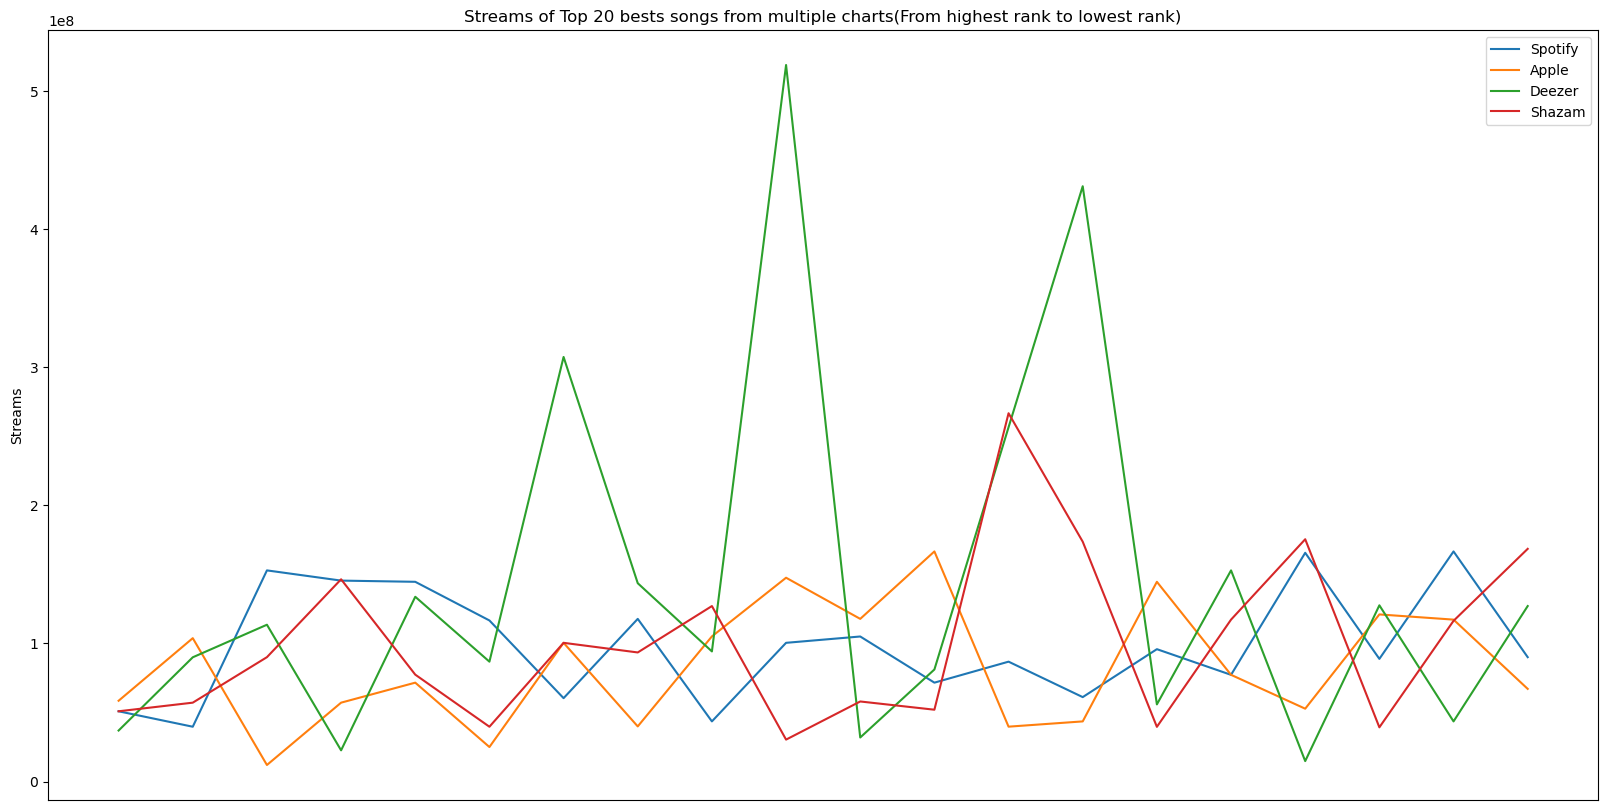

In [153]:
x = np.arange(1, 21)
plt.figure(figsize=(20, 10))

plt.plot(x, spotify_best_songs['streams'][:20], label='Spotify')
plt.plot(x, apple_best_songs['streams'][:20], label='Apple')
plt.plot(x, deezer_best_songs['streams'][:20], label='Deezer')
plt.plot(x, shazam_best_songs['streams'][:20], label='Shazam')

plt.title('Streams of Top 20 bests songs from multiple charts(From highest rank to lowest rank)')

plt.tick_params(bottom = False) 
plt.xticks([])
plt.ylabel("Streams")
plt.legend()
plt.show();

**3 best songs from `Deezer` charts which has the remarkable streams**

In [154]:
deezer_best_songs[:20].sort_values('streams', ascending=False)[:3].T

,49,131,181
track_name,Die For You - Remix,OMG,Fin de Semana
artist(s)_name,"Ariana Grande, The Weeknd",NewJeans,"Oscar Maydon, Junior H"
artist_count,2,1,2
released_year,2023,2023,2023
released_month,2,1,1
released_day,24,2,13
in_spotify_playlists,3408,1783,592
in_spotify_charts,47.0,27.0,14.0
streams,518745108.0,430977451.0,307370144.0
in_apple_playlists,87,26,11


- Comments

  - Different platforms have different streams of bests songs. Some platforms the streams are more significant than the others(`Deezer`). 
  - We can see most of the streams take place in `Deezer`
  - The songs which has the highest rank does not mean that its stream will be the highest
  - There are 3 songs in `Deezer` have the most streams compare to the bests songs from other platforms: 

    1. Die For You - Remix
    2. OMG 
    3. Fin de Semana

<i>**Top 10 songs that appear most frequently in Spotify, Apple and Deezer playlist**<i/>


C:\Users\Nien\AppData\Local\Temp\ipykernel_28792\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_28792\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_28792\2426515695.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
C:\Users\Nien\AppData\Local\Temp\ipykernel_28792\2426515695.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


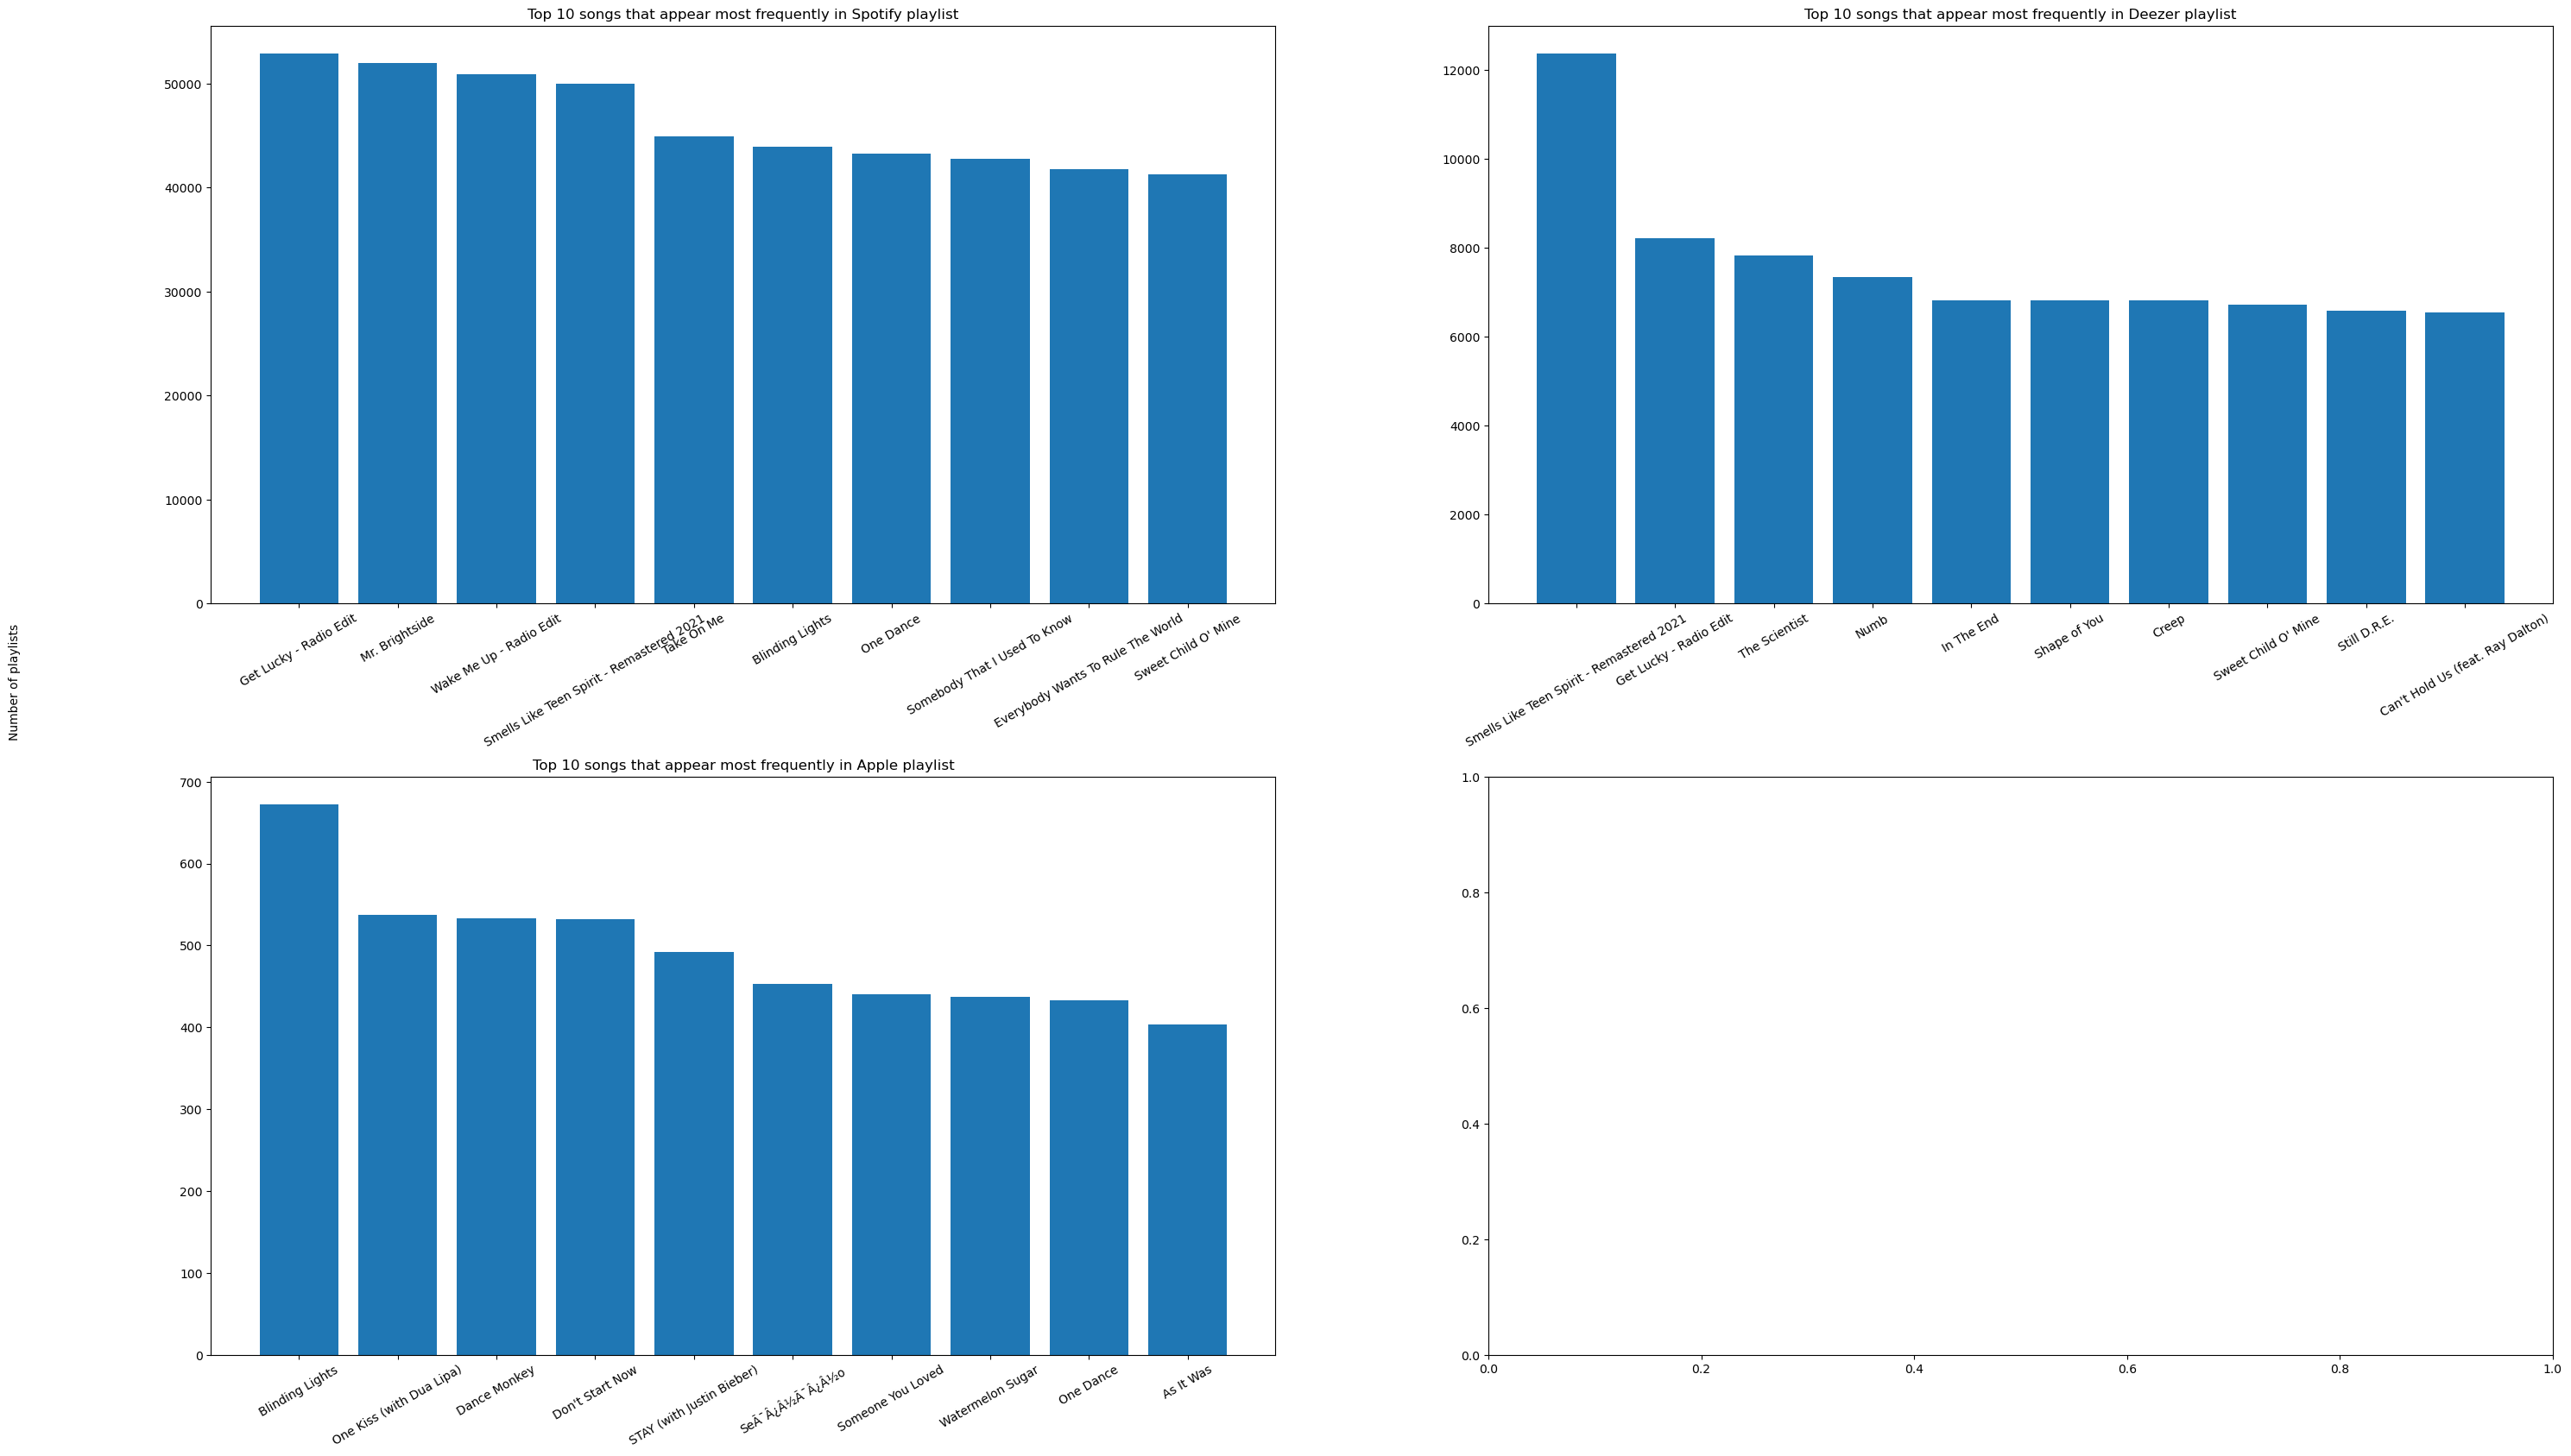

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(35, 20))

platforms = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']

count = 0
for platform in platforms:
  title = platform.split("_")[1]
  songs_df = df[['track_name', platform]].sort_values(by=platform, ascending=False)

  songs = songs_df['track_name']
  counts = songs_df[platform]
  axes[count//2][count%2].bar(songs[:10], counts[:10])
  axes[count//2][count%2].set_xticklabels(songs, rotation=30)
  axes[count//2][count%2].set_title('Top 10 songs that appear most frequently in ' + title.capitalize() + ' playlist')
  
  count += 1
fig.text(0.06, 0.5, 'Number of playlists', ha='center', va='center', rotation='vertical')

fig.subplots_adjust(hspace=0.3)
fig.show();

- Comment
  - People who using Deezer love listening to `Smells Like Teen Spirit`(we can see that number of playlist that include this song is very high compare to Top 2 and below)
  - The songs that included the most in `Spotify` playlists have the amount of playlists that are **extremely high** compare to `Apple`  

- Get 3 top songs most appear in playlist from Spotify

In [162]:
top_playlist_songs = df.sort_values(by='in_spotify_playlists', ascending=False)[:3]
top_playlist_songs.T

,757,630,720
track_name,Get Lucky - Radio Edit,Mr. Brightside,Wake Me Up - Radio Edit
artist(s)_name,"Pharrell Williams, Nile Rodgers, Daft Punk",The Killers,Avicii
artist_count,3,1,1
released_year,2013,2003,2013
released_month,1,9,1
released_day,1,23,1
in_spotify_playlists,52898,51979,50887
in_spotify_charts,0.0,15.0,34.0
streams,933815613.0,1806617704.0,1970673297.0
in_apple_playlists,203,306,315


📝 **Some insights**
- Some songs which is the most popular song in a year but its streams are very low compare to the best songs from the other years(**You Make It Fell Like Christmas, Cupid or Sigue,...**)
- The streams is changing unexpectedly in some phases(**1982-1983, 1997-1998 and 2005-2007**). Therefore, in some years, people tend to listen to music more than other years.
- The average streams of each years changing remarkably
- The best songs from different platform's chart(Spotify, Deezer, Apple or Shazam) have the streams that are very different. Especially in `Deezer`.
- The songs that appear most frequently in playlists of different platforms have the streams that are very noticeable. Especially in **Spotify** when compare to **Apple**   

**After analysing, now we will find some attributes of the best songs that we have found**

#### Find factors that makes the best songs

<i>**Take a quick glance at the attributes of the best songs that we have found from the previous section**</i>

1. Highest streams song
2. Song with highest streams of a year
3. Songs which create significant changing rate
4. Top 3 songs from each chart(Spotify, Deezer, Shazam, Apple)
5. 

In [164]:
# highest_streams_song
# highest_streams_respected_year_songs.T
# significant_changing_rate_songs



,55
track_name,Blinding Lights
artist(s)_name,The Weeknd
artist_count,1
released_year,2019
released_month,11
released_day,29
in_spotify_playlists,43899
in_spotify_charts,69.0
streams,3703895074.0
in_apple_playlists,672


### 2.3 Answer the question